In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

# ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier, Pool

# DL
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

import os
import platform
# 한글 폰트 사용시 마이너스 폰트 깨짐 해결
if platform.system() == 'Darwin': # 맥
    plt.rc('font', family='AppleGothic') 
else: # 윈도우
    plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

#인터프리터 유지
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

# seaborn palette
palette = ['Set2', 'coolwarm', 'cubehelix', 'pastel']
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f', '#e5c494', '#b3b3b3']

RANDOM_STATE = 42

In [50]:
cat_raw_df = pd.read_csv('./Telco-Customer-Churn.csv')
cat_raw_df['TotalCharges'] = pd.to_numeric(cat_raw_df['TotalCharges'], errors='coerce')
cat_raw_df['TotalCharges'] = cat_raw_df['TotalCharges'].fillna(0) 

cat_df = pd.read_csv('./data/Cat_Preprocessed_Telco_Customer_Churn.csv')

df = pd.read_csv('./data/Preprocessed_Telco_Customer_Churn.csv')

raw_df = df.drop(['tenure_short', 'tenure_mid', 'tenure_long', 'MonthlyCharges_group1',
                'MonthlyCharges_group2', 'MonthlyCharges_group3', 'MonthlyCharges_group4',
                'TotalCharges_group1', 'TotalCharges_group2', 'TotalCharges_group3'], axis=1)

display(cat_raw_df.head())
display(cat_df.head())
display(raw_df.head())
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin,MonthlyCharges_group,TotalCharges_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,short,low,low
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.50,No,mid,mid,low
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,short,mid,low
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,mid,mid,low
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,short,high,low


,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID,Churn,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,1,0,1,0,0,...,1,0,0,1,0,7590-VHVEG,0,1,29.85,29.85
1,0,0,1,1,0,1,0,0,1,1,...,0,0,0,0,1,5575-GNVDE,0,34,56.95,1889.50
2,0,0,1,1,0,1,0,0,1,1,...,1,0,0,0,1,3668-QPYBK,1,2,53.85,108.15
3,0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,0,7795-CFOCW,0,45,42.30,1840.75
4,0,1,0,1,0,1,0,0,1,1,...,1,0,0,1,0,9237-HQITU,1,2,70.70,151.65


,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,MonthlyCharges_group1,MonthlyCharges_group2,MonthlyCharges_group3,MonthlyCharges_group4,TotalCharges_group1,TotalCharges_group2,TotalCharges_group3,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,1,0,1,0,0,...,1,0,0,0,1,0,0,1,29.85,29.85
1,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0,34,56.95,1889.50
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,1,0,0,2,53.85,108.15
3,0,0,1,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,45,42.30,1840.75
4,0,1,0,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,2,70.70,151.65


## 1. Model Pipeline

## 1-1. Raw Data vs. Pre-processed Data

In [51]:
X_raw = raw_df.drop(['Churn', 'customerID'], axis=1)
y_raw = raw_df['Churn']

X_raw_train, X_raw_test, y_raw_train, y_raw_test = train_test_split(X_raw, y_raw, test_size=0.3,
                                                    stratify=raw_df['Churn'],
                                                    random_state=RANDOM_STATE)

scaler = StandardScaler()
X_raw_train = scaler.fit_transform(X_raw_train)
X_raw_test = scaler.transform(X_raw_test)

print(X_raw_train.shape, X_raw_test.shape, y_raw_train.shape, y_raw_test.shape)

# Catboost 모델링을 위한 컬럼 추출
X_raw_cat = cat_raw_df.drop(['customerID', 'Churn'], axis=1)
y_raw_cat = cat_raw_df['Churn']

le = LabelEncoder()
y_raw_cat = le.fit_transform(y_raw_cat)

X_raw_cat_train, X_raw_cat_test, y_raw_cat_train, y_raw_cat_test = train_test_split(X_raw_cat, y_raw_cat, test_size=0.3,
                                                    stratify=cat_raw_df['Churn'],
                                                    random_state=RANDOM_STATE)
print(X_raw_cat_train.shape, X_raw_cat_test.shape, y_raw_cat_train.shape, y_raw_cat_test.shape)

categorical_columns = X_raw_cat.select_dtypes(include=['object']).columns.tolist()
catboost_train_pool = Pool(data=X_raw_cat_train, label=y_raw_cat_train, cat_features=categorical_columns)

(4930, 45) (2113, 45) (4930,) (2113,)
(4930, 19) (2113, 19) (4930,) (2113,)


### 1-1-1. Model Evaluation with Raw Data

In [52]:
# 모델 초기화
models = {
    "Logistic Regression": LogisticRegression(random_state=RANDOM_STATE),
    "Decision Tree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(random_state=RANDOM_STATE),
    "LightGBM": lgb.LGBMClassifier(random_state=RANDOM_STATE),
    "CatBoost": CatBoostClassifier(random_state=RANDOM_STATE, verbose=False)
}

# MLP 모델
def create_model(learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=X_raw_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

# 조기 종료 콜백
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
mlp_model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=64, verbose=0)
models["MLP"] = mlp_model

# 결과 저장 딕셔너리
f1_results = {model: {"raw": 0, "preprocessed": 0} for model in models}
roc_auc_results = {model: {"raw": 0, "preprocessed": 0} for model in models}

# raw 데이터의 모델 훈련 및 평가
for name, model in models.items():
    if name == 'Catboost':
        model.fit(catboost_train_pool)
        y_pred = model.predict(X_raw_cat_test)
        print(f'\nClassification Report for {name}:')
        print(classification_report(y_raw_cat_test, y_pred))
        print()
        f1_results[name]["preprocessed"] = f1_score(y_raw_cat_test, y_pred)
        roc_auc_results[name]["preprocessed"] = roc_auc_score(y_raw_cat_test, y_pred)
        continue
    
    elif name == 'MLP':
        model.fit(X_raw_train, y_raw_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stop])
        y_pred = (model.predict(X_raw_test) > 0.5).astype("int32")
        
    else:
        model.fit(X_raw_train, y_raw_train)
        y_pred = model.predict(X_raw_test)
    
    print(f'\nClassification Report for {name}:')
    print(classification_report(y_raw_test, y_pred))
    print()
    
    f1_results[name]["raw"] = f1_score(y_raw_test, y_pred)
    roc_auc_results[name]["raw"] = roc_auc_score(y_raw_test, y_pred)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.67      0.56      0.61       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1552
           1       0.48      0.49      0.49       561

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.62      0.48      0.54       561

    accuracy                           0.78     

### 1-1-2. Model Evaluation with Pre-Processed Data

In [53]:
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=df['Churn'],
                                                    random_state=RANDOM_STATE)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Catboost 모델링을 위한 컬럼 추출
X_cat = cat_df.drop(['customerID', 'Churn'], axis=1)

le = LabelEncoder()
encoded_labels = le.fit_transform(cat_df['Churn'])
# numpy 배열로 변환된 것을 데이터프레임에 추가
cat_df['Churn'] = encoded_labels
y_cat = cat_df['Churn']
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size=0.3,
                                                    stratify=cat_df['Churn'],
                                                    random_state=RANDOM_STATE)
print(X_cat_train.shape, X_cat_test.shape, y_cat_train.shape, y_cat_test.shape)

categorical_columns = X_cat.select_dtypes(include=['object']).columns.tolist()
catboost_train_pool = Pool(data=X_cat_train, label=y_cat_train, cat_features=categorical_columns)

(4930, 55) (2113, 55) (4930,) (2113,)
(4930, 22) (2113, 22) (4930,) (2113,)


In [54]:
# 모델 초기화
models = {
    "Logistic Regression": LogisticRegression(random_state=RANDOM_STATE),
    "Decision Tree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(random_state=RANDOM_STATE),
    "LightGBM": lgb.LGBMClassifier(random_state=RANDOM_STATE),
    "CatBoost": CatBoostClassifier(random_state=RANDOM_STATE, verbose=False)
}

# MLP 모델
def create_model(learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

# 조기 종료 콜백
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
mlp_model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=64, verbose=0)
models["MLP"] = mlp_model

# raw 데이터의 모델 훈련 및 평가
for name, model in models.items():
    if name == 'Catboost':
        model.fit(catboost_train_pool)
        y_pred = model.predict(X_cat_test)
        print(f'\nClassification Report for {name}:')
        print(classification_report(y_cat_test, y_pred))
        print()
        f1_results[name]["preprocessed"] = f1_score(y_test, y_pred)
        roc_auc_results[name]["preprocessed"] = roc_auc_score(y_test, y_pred)
        continue
    
    elif name == 'MLP':
        model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stop])
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
        
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    print(f'\nClassification Report for {name}:')
    print(classification_report(y_test, y_pred))
    print()
    
    f1_results[name]["preprocessed"] = f1_score(y_test, y_pred)
    roc_auc_results[name]["preprocessed"] = roc_auc_score(y_test, y_pred)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1552
           1       0.66      0.55      0.60       561

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1552
           1       0.49      0.49      0.49       561

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.73      0.73      0.73      2113



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1552
           1       0.61      0.49      0.54       561

    accuracy                           0.78     

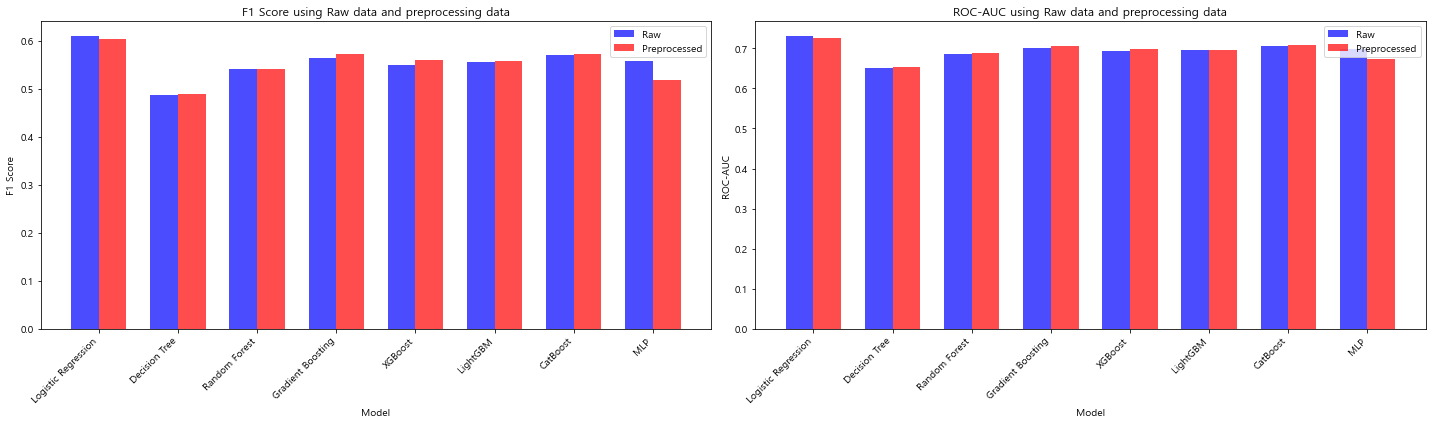

In [55]:
# # 시각화
# labels = list(f1_results.keys())
# raw_scores = [f1_results[label]["raw"] for label in labels]
# preprocessed_scores = [f1_results[label]["preprocessed"] for label in labels]

# x = np.arange(len(labels))
# width = 0.35

# # 그래프 그리기
# fig, ax = plt.subplots(figsize=(12, 6))
# rects1 = ax.bar(x - width/2, raw_scores, width, label='Raw', color='b', alpha=0.7)
# rects2 = ax.bar(x + width/2, preprocessed_scores, width, label='Preprocessed', color='r', alpha=0.7)

# # 범례 추가
# ax.legend()

# # 축 및 제목 설정
# ax.set_xlabel('Model')
# ax.set_ylabel('F1 Score')
# ax.set_title('F1 Score using Raw data and preprocessing data')

# # x축 레이블 회전
# plt.xticks(x, labels, rotation=45, ha='right')

# # 그래프 보여주기
# plt.tight_layout()
# plt.show()

# # ROC-AUC 시각화
# labels = list(roc_auc_results.keys())
# raw_scores = [roc_auc_results[label]["raw"] for label in labels]
# preprocessed_scores = [roc_auc_results[label]["preprocessed"] for label in labels]

# x = np.arange(len(labels))
# width = 0.35

# # 그래프 그리기
# fig, ax = plt.subplots(figsize=(12, 6))
# rects1 = ax.bar(x - width/2, raw_scores, width, label='Raw', color='b', alpha=0.7)
# rects2 = ax.bar(x + width/2, preprocessed_scores, width, label='Preprocessed', color='r', alpha=0.7)

# # 범례 추가
# ax.legend()

# # 축 및 제목 설정
# ax.set_xlabel('Model')
# ax.set_ylabel('ROC-AUC')
# ax.set_title('ROC-AUC using Raw data and preprocessing data')

# # x축 레이블 회전
# plt.xticks(x, labels, rotation=45, ha='right')

# # 그래프 보여주기
# plt.tight_layout()
# plt.show()



# F1 Score 데이터 준비
labels = list(f1_results.keys())
raw_scores_f1 = [f1_results[label]["raw"] for label in labels]
preprocessed_scores_f1 = [f1_results[label]["preprocessed"] for label in labels]

# ROC-AUC 데이터 준비
raw_scores_roc = [roc_auc_results[label]["raw"] for label in labels]
preprocessed_scores_roc = [roc_auc_results[label]["preprocessed"] for label in labels]

x = np.arange(len(labels))
width = 0.35

# 그래프 그리기
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# F1 Score 그래프
rects1 = ax1.bar(x - width/2, raw_scores_f1, width, label='Raw', color='b', alpha=0.7)
rects2 = ax1.bar(x + width/2, preprocessed_scores_f1, width, label='Preprocessed', color='r', alpha=0.7)
ax1.set_xlabel('Model')
ax1.set_ylabel('F1 Score')
ax1.set_title('F1 Score using Raw data and preprocessing data')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha='right')
ax1.legend()

# ROC-AUC 그래프
rects1 = ax2.bar(x - width/2, raw_scores_roc, width, label='Raw', color='b', alpha=0.7)
rects2 = ax2.bar(x + width/2, preprocessed_scores_roc, width, label='Preprocessed', color='r', alpha=0.7)
ax2.set_xlabel('Model')
ax2.set_ylabel('ROC-AUC')
ax2.set_title('ROC-AUC using Raw data and preprocessing data')
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=45, ha='right')
ax2.legend()

plt.tight_layout()
plt.show()

### 1-1-3. Model Evaluation with Pre-Processed Data (Stratified KFold)

In [56]:
# Stratified K Fold 적용
# 모델 초기화
models = {
    "Logistic Regression": LogisticRegression(random_state=RANDOM_STATE),
    "Decision Tree": DecisionTreeClassifier(random_state=RANDOM_STATE),
    "Random Forest": RandomForestClassifier(random_state=RANDOM_STATE),
    "Gradient Boosting": GradientBoostingClassifier(random_state=RANDOM_STATE),
    "XGBoost": XGBClassifier(random_state=RANDOM_STATE),
    "LightGBM": lgb.LGBMClassifier(random_state=RANDOM_STATE),
    "CatBoost": CatBoostClassifier(random_state=RANDOM_STATE, verbose=False)
}

# MLP 모델
def create_model(learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

# 조기 종료 콜백
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
mlp_model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=64, verbose=0)
models["MLP"] = mlp_model

n_splits = 5
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)

# 결과 저장 딕셔너리
f1_cv_results = {model: {"raw": 0, "preprocessed": 0} for model in models}
roc_auc_cv_results = {model: {"raw": 0, "preprocessed": 0} for model in models}

# # 모델별 평가 및 ROC 커브 그리기
# plt.figure(figsize=(12, 8))

# evaluate_model 함수 정의
def evaluate_model(model, y_pred, y_test, X_test, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # ROC Curve
    if hasattr(model, "predict_proba"):
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        return accuracy, precision, recall, f1, roc_auc, fpr, tpr
    else:
        return accuracy, precision, recall, f1, roc_auc, None, None

    
for name, model in models.items():
    print(f"Training and evaluating model: {name}")
    
    if name == 'CatBoost':        
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
        roc_auc_scores = []
        # fpr_scores = []
        # tpr_scores = []
        
        for train_idx, val_idx in stratified_kfold.split(X_cat, y_cat):
            X_train_fold, X_val_fold = X_cat.iloc[train_idx], X_cat.iloc[val_idx]
            y_train_fold, y_val_fold = y_cat.iloc[train_idx], y_cat.iloc[val_idx]
            
            catboost_train_pool = Pool(X_train_fold, y_train_fold, cat_features=categorical_columns)
            model.fit(catboost_train_pool)
            
            y_pred_fold = model.predict(X_val_fold)
            
            acc, pre, re, f1, roc, fpr, tpr = evaluate_model(model, y_pred_fold, y_val_fold, X_val_fold, name)
            accuracy_scores.append(acc)
            precision_scores.append(pre)
            recall_scores.append(re)
            f1_scores.append(f1)
            roc_auc_scores.append(roc)
            # fpr_scores.append(fpr)
            # tpr_scores.append(tpr)
            
        # if fpr is not None:
        #     plt.plot(np.mean(fpr_scores), np.mean(tpr_scores), label=f'{name} (AUC = {roc:.2f})')
        
        # 평균값 사용
        f1_cv_results[name]["preprocessed"] = np.mean(f1_scores)
        roc_auc_cv_results[name]["preprocessed"] = np.mean(roc_auc_scores)
    
    elif name == 'MLP':
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
        roc_auc_scores = []
        
        model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stop])
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
        
        acc, pre, re, f1, roc, fpr, tpr = evaluate_model(model, y_pred, y_test, X_test, name)
        accuracy_scores.append(acc)
        precision_scores.append(pre)
        recall_scores.append(re)
        f1_scores.append(f1)
        roc_auc_scores.append(roc)
        
        # # ROC Curve for MLP
        # fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
        # plt.plot(fpr, tpr, label='MLP (AUC = {:.2f})'.format(roc))
        
        f1_cv_results[name]["preprocessed"] = f1_score(y_test, y_pred)
        roc_auc_cv_results[name]["preprocessed"] = roc_auc_score(y_test, y_pred)
        
    else:
        accuracy_scores = []
        precision_scores = []
        recall_scores = []
        f1_scores = []
        roc_auc_scores = []
        fpr_scores = []
        tpr_scores = []
        
        for train_idx, val_idx in stratified_kfold.split(X, y):
            X_train_fold, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
            y_train_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]
            
            model.fit(X_train_fold, y_train_fold)
            y_pred_fold = model.predict(X_val_fold)
            
            acc, pre, re, f1, roc, fpr, tpr = evaluate_model(model, y_pred_fold, y_val_fold, X_val_fold, name)
            
            accuracy_scores.append(acc)
            precision_scores.append(pre)
            recall_scores.append(re)
            f1_scores.append(f1)
            roc_auc_scores.append(roc)
            # fpr_scores.append(fpr)
            # tpr_scores.append(tpr)
            
        # if fpr is not None:
        #     plt.plot(np.mean(fpr_scores), np.mean(tpr_scores), label=f'{name} (AUC = {roc:.2f})')
        
        # 평균값 사용
        f1_cv_results[name]["preprocessed"] = np.mean(f1_scores)
        roc_auc_cv_results[name]["preprocessed"] = np.mean(roc_auc_scores)
    
    print(f'\nModel Evaluation Metrics for {name}:')
    print(f'Accuracy: {np.mean(accuracy_scores)}')
    print(f'Precision: {np.mean(precision_scores)}')
    print(f'Recall: {np.mean(recall_scores)}')
    print(f'F1 Score: {np.mean(f1_scores)}')
    print(f'ROC AUC: {np.mean(roc_auc_scores)}')
    print()
    
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve Comparison')
# plt.legend(loc='best')
# plt.grid()
# plt.show()

Training and evaluating model: Logistic Regression

Model Evaluation Metrics for Logistic Regression:
Accuracy: 0.8046257016581715
Precision: 0.6611117879776391
Recall: 0.5403764820576049
F1 Score: 0.5945454535877439
ROC AUC: 0.7202265519829321

Training and evaluating model: Decision Tree

Model Evaluation Metrics for Decision Tree:
Accuracy: 0.7252576779147042
Precision: 0.48303658814979344
Recall: 0.5018566042063913
F1 Score: 0.4921672683247915
ROC AUC: 0.6539045960323111

Training and evaluating model: Random Forest

Model Evaluation Metrics for Random Forest:
Accuracy: 0.7871605627782438
Precision: 0.6277475217543936
Recall: 0.48311852159825663
F1 Score: 0.5457155212538221
ROC AUC: 0.6900511173853421

Training and evaluating model: Gradient Boosting

Model Evaluation Metrics for Gradient Boosting:
Accuracy: 0.805904614813859
Precision: 0.6675230224408141
Recall: 0.534488394431621
F1 Score: 0.5935068956843813
ROC AUC: 0.7192159031745655

Training and evaluating model: XGBoost

Mode

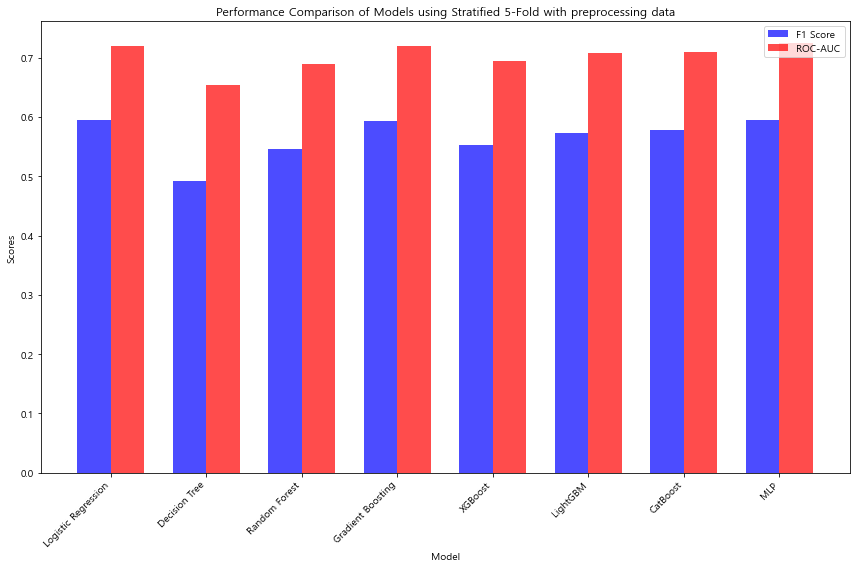

In [57]:
# F1 Score 데이터 준비
labels = list(f1_cv_results.keys())
raw_scores_f1 = [f1_cv_results[label]["raw"] for label in labels]
preprocessed_scores_f1 = [f1_cv_results[label]["preprocessed"] for label in labels]

# ROC-AUC 데이터 준비
raw_scores_roc = [roc_auc_cv_results[label]["raw"] for label in labels]
preprocessed_scores_roc = [roc_auc_cv_results[label]["preprocessed"] for label in labels]


x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 8))

# F1 Score 및 ROC-AUC 그래프
rects1 = ax.bar(x - width/2, preprocessed_scores_f1, width, label='F1 Score', color='b', alpha=0.7)
rects2 = ax.bar(x + width/2, preprocessed_scores_roc, width, label='ROC-AUC', color='r', alpha=0.7)

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Models using Stratified 5-Fold with preprocessing data')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

Logistic Regression does not have feature_importances_ attribute


<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

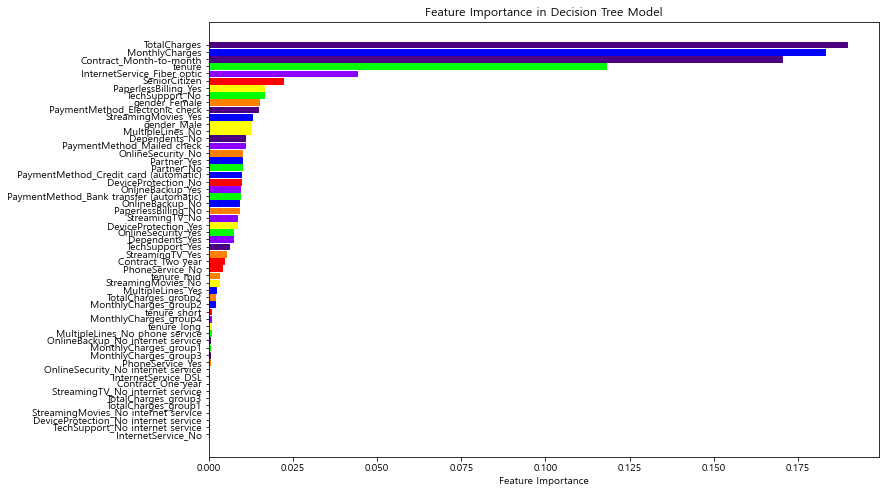

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

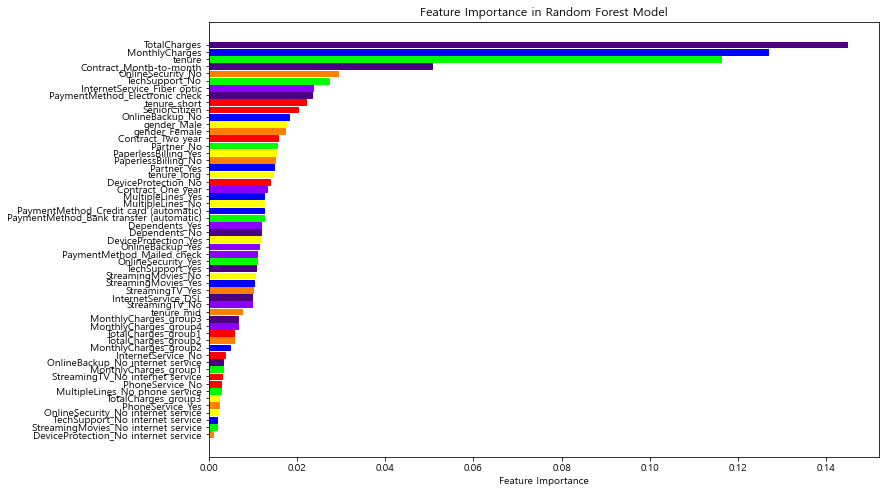

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

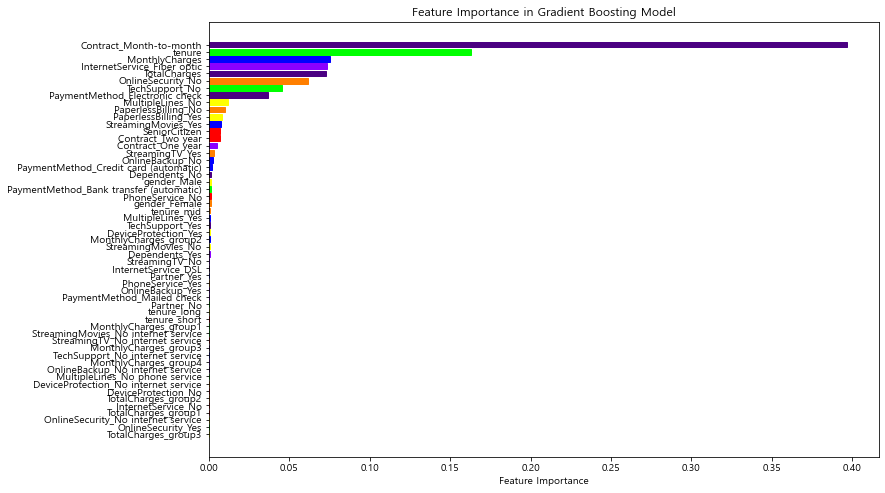

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

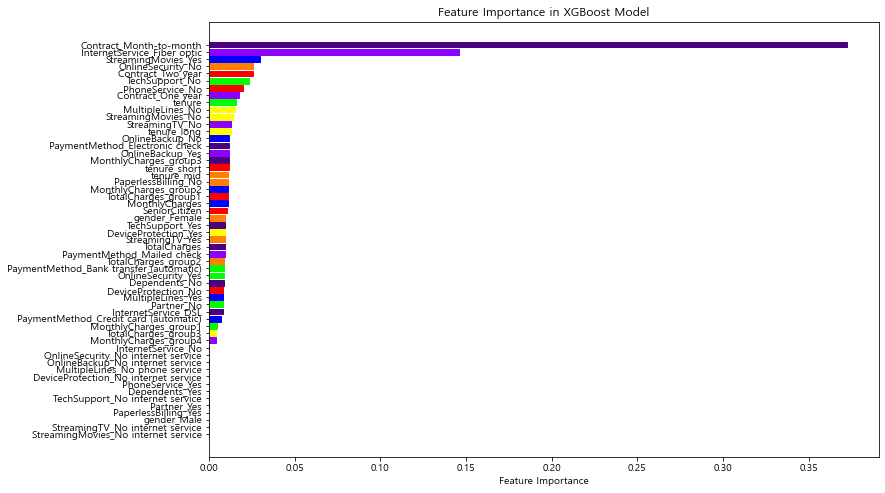

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

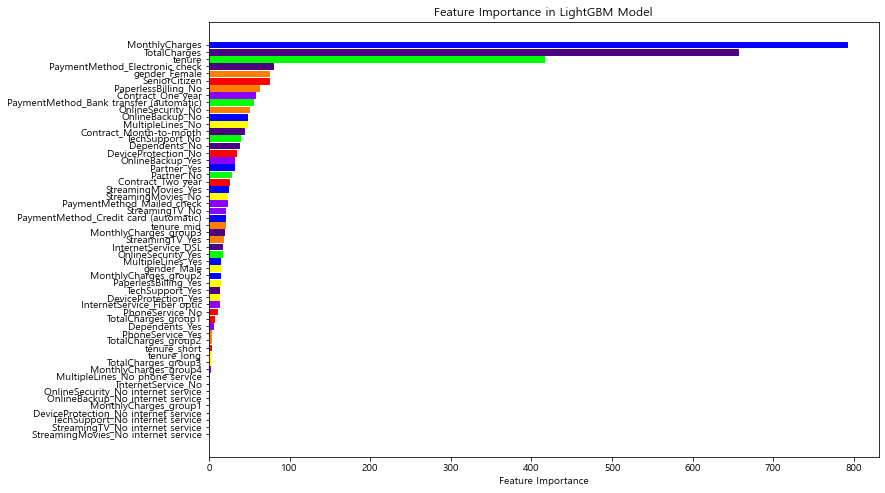

<Figure size 432x288 with 0 Axes>

<Figure size 864x576 with 0 Axes>

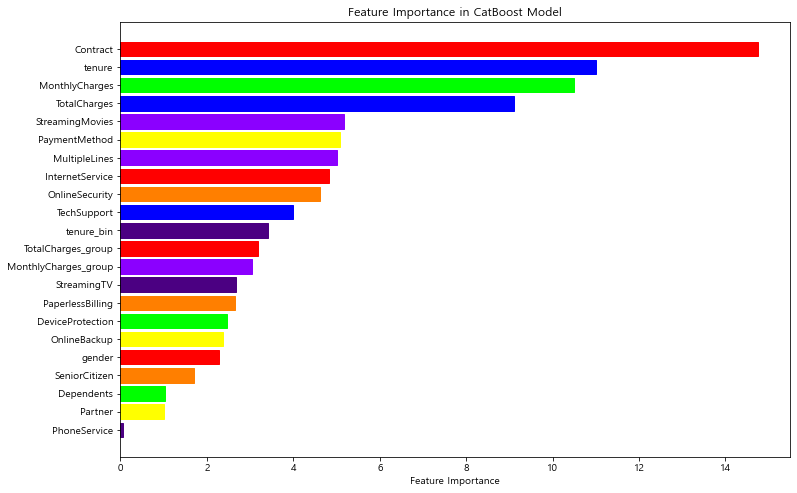

<Figure size 432x288 with 0 Axes>

MLP does not have feature_importances_ attribute


<Figure size 432x288 with 0 Axes>

In [58]:
# Plot Feature Importance
def plot_feature_importances(model, features, model_name, catboost_data=None):
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        sorted_idx = np.argsort(feature_importances)
        
        
        plt.figure(figsize=(12, 8))
        #colors = plt.cm.viridis(np.linspace(0, 1, len(sorted_idx)))
        #plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
        # Define rainbow colors
        rainbow_colors = ['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF', '#4B0082', '#8B00FF']
        
        plt.figure(figsize=(12, 8))
        bars = plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
        # Assign rainbow colors to each bar
        for idx, bar in zip(sorted_idx, bars):
            bar.set_color(rainbow_colors[idx % len(rainbow_colors)])
            
        plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance in {model_name} Model')
        plt.show()
        
    elif model_name == "CatBoost" and catboost_data is not None:
        feature_importances = model.get_feature_importance(catboost_data)
        sorted_idx = np.argsort(feature_importances)
        
        plt.figure(figsize=(12, 8))
        plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
        plt.yticks(range(len(sorted_idx)), [catboost_data.get_feature_names()[i] for i in sorted_idx])
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance in {model_name} Model')
        plt.show()
    else:
        print(f"{model_name} does not have feature_importances_ attribute")
        
    
    plt.tight_layout()
    plt.show()

# 각 모델의 중요 변수 시각화
for name, model in models.items():
    if name != "CatBoost":  # CatBoost는 별도로 처리
        plot_feature_importances(model, X.columns, name)
    else:
        # cat_X = catboost_data.drop(['Churn'], axis=1)
        plot_feature_importances(model, X_cat.columns, name, catboost_data=Pool(X_cat, y_cat, cat_features=categorical_columns))
        


In [ ]:
# 범주형 파생 변수 생성
# 1. tenure_bin
def create_tenure_bin(x):
    if x < 24:
        return 'short'
    elif x < 48:
        return 'mid'
    else:
        return 'long'

def create_monthly_charge_group(x):
    # low mid high very high
    if x < 30:
        return 'low'
    elif x < 60:
        return 'mid'
    elif x < 90:
        return 'high'
    else:
        return 'very high'

def create_Total_charge_group(x):
    if x < 3000:
        return 'low'
    elif x < 6000:
        return 'mid'
    else:
        return 'high'

df['tenure_bin'] = df['tenure'].apply(create_tenure_bin)
df['MonthlyCharges_group'] = df['MonthlyCharges'].apply(create_monthly_charge_group)
df['TotalCharges_group'] = df['TotalCharges'].apply(create_Total_charge_group)

In [ ]:
df.to_csv('./data/Cat_Preprocessed_Telco_Customer_Churn.csv', encoding='utf-8', index=False)

In [ ]:
# 파생 변수 생성
# 1. tenure bin
df['tenure_short'] = df['tenure'].apply(lambda x: 1 if x < 24 else 0)
df['tenure_mid'] = df['tenure'].apply(lambda x: 1 if x >= 24 and x < 48 else 0)
df['tenure_long'] = df['tenure'].apply(lambda x: 1 if x >= 48 else 0)

# 2. Monhtly Charges group
df['MonthlyCharges_group1'] = df['MonthlyCharges'].apply(lambda x: 1 if x < 30 else 0)
df['MonthlyCharges_group2'] = df['MonthlyCharges'].apply(lambda x: 1 if x >= 30 and x < 60 else 0)
df['MonthlyCharges_group3'] = df['MonthlyCharges'].apply(lambda x: 1 if x >= 60 and x < 90 else 0)
df['MonthlyCharges_group4'] = df['MonthlyCharges'].apply(lambda x: 1 if x >= 90 else 0)

# 3. Total Charges group
df['TotalCharges_group1'] = df['TotalCharges'].apply(lambda x: 1 if x < 3000 else 0)
df['TotalCharges_group2'] = df['TotalCharges'].apply(lambda x: 1 if x >= 3000 and x < 6000 else 0)
df['TotalCharges_group3'] = df['TotalCharges'].apply(lambda x: 1 if x >= 6000 else 0)

In [46]:
# get_dummies
ramain_vars = ['customerID', 'Churn', 
                'tenure_short', 'tenure_mid', 'tenure_long', 'MonthlyCharges_group1',
                'MonthlyCharges_group2', 'MonthlyCharges_group3',
                'MonthlyCharges_group4', 'TotalCharges_group1', 'TotalCharges_group2',
                'TotalCharges_group3', 'tenure', 'MonthlyCharges', 'TotalCharges',
                'tenure_bin', 'MonthlyCharges_group', 'TotalCharges_group']
categorical_vars = df.drop(ramain_vars, axis=1)
cat_df = pd.get_dummies(categorical_vars).astype(int)
df['Churn'] = df['Churn'].replace({"No": 0, "Yes": 1})
df = pd.concat([cat_df, df[ramain_vars]], axis=1)

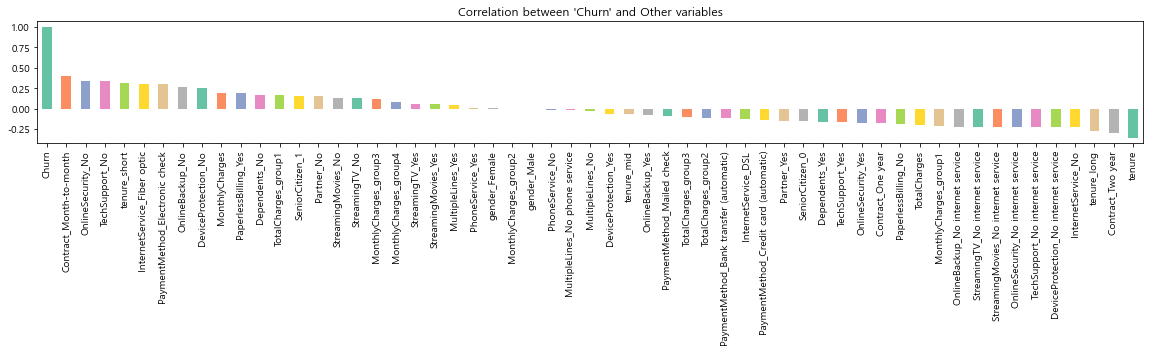

In [47]:
# 'Churn' 변수와의 상관관계
plt.figure(figsize=(16,5))
tmp_df = df.drop(['customerID'], axis=1)
tmp_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color=colors)
plt.title("Correlation between 'Churn' and Other variables")
plt.tight_layout()
plt.show()

In [ ]:
df = df.drop(['tenure_bin', 'MonthlyCharges_group', 'TotalCharges_group'], axis=1)
df.to_csv('./data/Preprocessed_Telco_Customer_Churn.csv', encoding='utf-8', index=False)

### 5. 후보 예측 모델 선정 및 성능 비교

Training Logistic Regression...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...


c:\Users\USER\.conda\envs\proj2\lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1496, number of negative: 4138
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000502 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 55
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265531 -> initscore=-1.017418
[LightGBM] [Info] Start training from score -1.017418
Training CatBoost...


C:\Users\USER\AppData\Local\Temp/ipykernel_25852/2293846717.py:88: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  mlp_model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)



Model Evaluation Metrics for Logistic Regression:
Accuracy: 0.8204400283889283
Precision: 0.6935483870967742
Recall: 0.5764075067024129
F1 Score: 0.6295754026354321
ROC AUC: 0.7423543325017857
Confusion Matrix: 
[[941  95]
 [158 215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



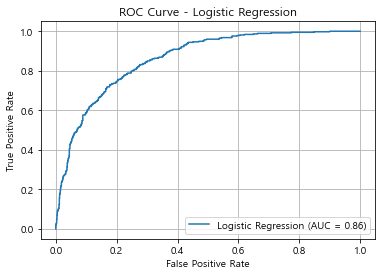


Model Evaluation Metrics for Decision Tree:
Accuracy: 0.7146912704045423
Precision: 0.4625322997416021
Recall: 0.47989276139410186
F1 Score: 0.4710526315789474
ROC AUC: 0.6395602803109506
Confusion Matrix: 
[[828 208]
 [194 179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1036
           1       0.46      0.48      0.47       373

    accuracy                           0.71      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.71      0.72      1409



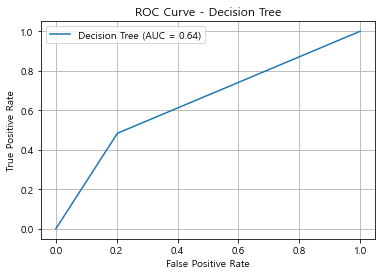


Model Evaluation Metrics for Random Forest:
Accuracy: 0.7927608232789212
Precision: 0.6551724137931034
Recall: 0.4584450402144772
F1 Score: 0.5394321766561514
ROC AUC: 0.6857862266709451
Confusion Matrix: 
[[946  90]
 [202 171]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



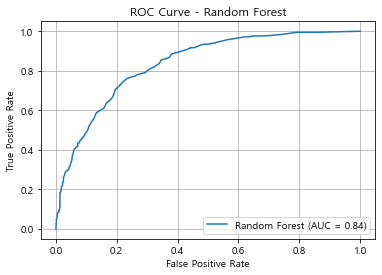


Model Evaluation Metrics for Gradient Boosting:
Accuracy: 0.808374733853797
Precision: 0.6710963455149501
Recall: 0.5415549597855228
F1 Score: 0.5994065281899109
ROC AUC: 0.7229975571128385
Confusion Matrix: 
[[937  99]
 [171 202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



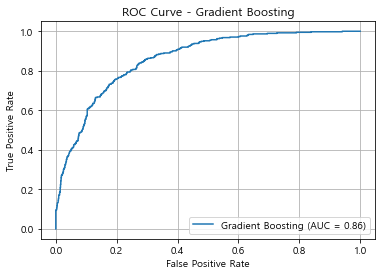


Model Evaluation Metrics for XGBoost:
Accuracy: 0.7927608232789212
Precision: 0.6327868852459017
Recall: 0.517426273458445
F1 Score: 0.5693215339233039
ROC AUC: 0.7046590826751685
Confusion Matrix: 
[[924 112]
 [180 193]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1036
           1       0.63      0.52      0.57       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



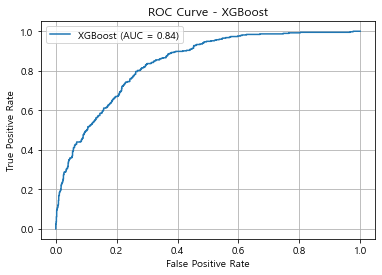


Model Evaluation Metrics for LightGBM:
Accuracy: 0.801277501774308
Precision: 0.6534653465346535
Recall: 0.5308310991957105
F1 Score: 0.5857988165680473
ROC AUC: 0.7147398739221796
Confusion Matrix: 
[[931 105]
 [175 198]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.65      0.53      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



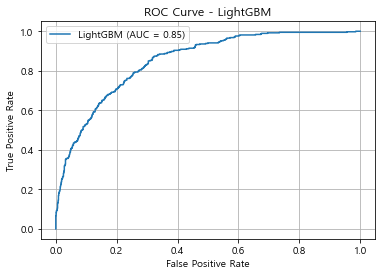


Model Evaluation Metrics for CatBoost:
Accuracy: 0.8360539389638041
Precision: 0.7398648648648649
Recall: 0.5871313672922251
F1 Score: 0.6547085201793722
ROC AUC: 0.7564035214839504
Confusion Matrix: 
[[959  77]
 [154 219]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1036
           1       0.74      0.59      0.65       373

    accuracy                           0.84      1409
   macro avg       0.80      0.76      0.77      1409
weighted avg       0.83      0.84      0.83      1409



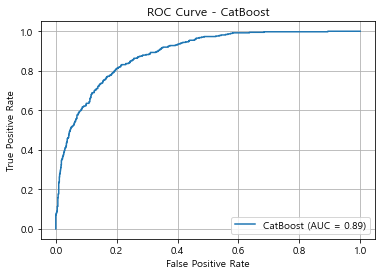

45/45 [==============================] - 0s 824us/step

MLP Evaluation Metrics:
Accuracy: 0.7934705464868701
Precision: 0.6666666666666666
Recall: 0.43967828418230565
F1 Score: 0.5298869143780292
ROC AUC: 0.6802638525158633
Confusion Matrix: 
[[954  82]
 [209 164]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.67      0.44      0.53       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

45/45 [==============================] - 0s 1ms/step


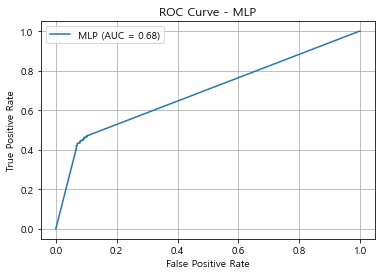


Model Evaluation Metrics for Logistic Regression:
Accuracy: 0.8204400283889283
Precision: 0.6935483870967742
Recall: 0.5764075067024129
F1 Score: 0.6295754026354321
ROC AUC: 0.7423543325017857
Confusion Matrix: 
[[941  95]
 [158 215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409


Model Evaluation Metrics for Decision Tree:
Accuracy: 0.7146912704045423
Precision: 0.4625322997416021
Recall: 0.47989276139410186
F1 Score: 0.4710526315789474
ROC AUC: 0.6395602803109506
Confusion Matrix: 
[[828 208]
 [194 179]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1036
           1       0.46      0.48      0.47      

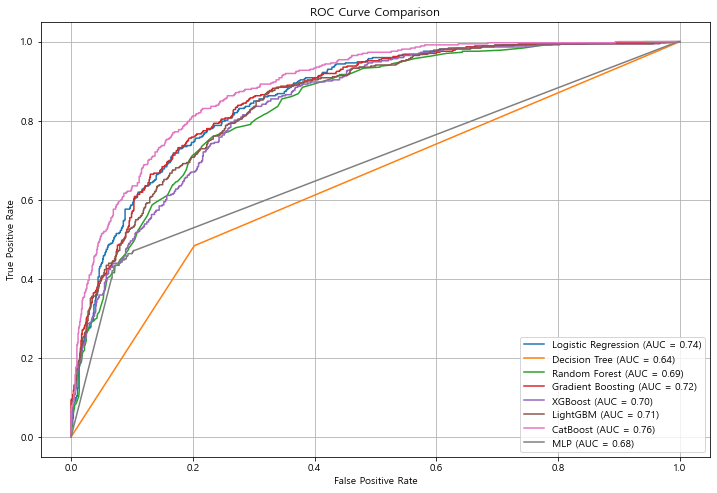

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import os
import platform


# CatBoost용 데이터 로드 및 전처리
cat_data = pd.read_csv('./data/Cat_Preprocessed_Telco_Customer_Churn.csv')  # CatBoost용 데이터
cat_data.drop(['customerID'], axis=1, inplace=True)  # customerID 열 삭제
cat_features = cat_data.select_dtypes(include=['object']).columns.tolist()
cat_features.remove('Churn')  # 'Churn'도 제거
cat_data[cat_features] = cat_data[cat_features].astype(str)

# 다른 모델용 데이터 로드 및 전처리
data = pd.read_csv('./data/Preprocessed_Telco_Customer_Churn.csv')  # 다른 모델용 데이터

# 'customerID' 열 삭제 (이미 삭제된 상태일 수도 있음)
data.drop(['customerID'], axis=1, inplace=True, errors='ignore')

# 'Churn' 열을 레이블로 변환 (이미 변환된 상태일 수도 있음)
le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])

# 훈련/테스트 데이터 분리
X = data.drop('Churn', axis=1)
y = data['Churn'].astype(int)  # y를 정수형으로 변환
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost용 훈련 데이터 분리
X_cat = cat_data.drop('Churn', axis=1)
y_cat = le.fit_transform(cat_data['Churn'])
X_train_cat, _, y_train_cat, _ = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42, stratify=y_cat)

# CatBoost용 범주형 변수 인덱스 설정
cat_features_index = [X_train_cat.columns.get_loc(col) for col in cat_features]

# 기본 모델 학습
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": CatBoostClassifier(cat_features=cat_features_index, verbose=0)
}

for name, model in models.items():
    print(f"Training {name}...")
    if name == "CatBoost":
        model.fit(X_train_cat, y_train_cat)
    else:
        model.fit(X_train, y_train)

# MLP 모델
def create_model(learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
    return model

mlp_model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)
mlp_model.fit(X_train, y_train)

# 모델 평가 함수
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    if model_name == "MLP":
        y_pred = (y_pred > 0.5).astype(int)
    print(f'\nModel Evaluation Metrics for {model_name}:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'ROC AUC: {roc_auc_score(y_test, y_pred)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
    
    # ROC Curve
    if hasattr(model, "predict_proba"):
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.2f})')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc='best')
        plt.grid()
        plt.show()

# 각 모델의 평가 및 시각화
for name, model in models.items():
    if name == "CatBoost":
        X_test_cat = cat_data.drop(['Churn'], axis=1).iloc[X_test.index, :]
        evaluate_model(model, X_test_cat, y_test, name)
    else:
        evaluate_model(model, X_test, y_test, name)

# MLP 모델 평가 및 ROC 커브 그리기
mlp_y_pred = (mlp_model.predict(X_test) > 0.5).astype("int32")
print('\nMLP Evaluation Metrics:')
print(f'Accuracy: {accuracy_score(y_test, mlp_y_pred)}')
print(f'Precision: {precision_score(y_test, mlp_y_pred)}')
print(f'Recall: {recall_score(y_test, mlp_y_pred)}')
print(f'F1 Score: {f1_score(y_test, mlp_y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, mlp_y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, mlp_y_pred)}')
print('\nClassification Report:')
print(classification_report(y_test, mlp_y_pred))

# ROC Curve for MLP
fpr, tpr, _ = roc_curve(y_test, mlp_model.model.predict(X_test))
plt.plot(fpr, tpr, label='MLP (AUC = {:.2f})'.format(roc_auc_score(y_test, mlp_y_pred)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP')
plt.legend(loc='best')
plt.grid()
plt.show()

# 모델 평가 함수
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f'\nModel Evaluation Metrics for {model_name}:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print(f'ROC AUC: {roc_auc_score(y_test, y_pred)}')
    print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print('\nClassification Report:')
    print(classification_report(y_test, y_pred))
    
    # ROC Curve
    if hasattr(model, "predict_proba"):
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
        return fpr, tpr, roc_auc_score(y_test, y_pred)
    else:
        return None, None, None

# 모델별 평가 및 ROC 커브 그리기
plt.figure(figsize=(12, 8))

for name, model in models.items():
    if name == "CatBoost":
        X_test_cat = cat_data.drop(['Churn'], axis=1).iloc[X_test.index, :]
        fpr, tpr, auc = evaluate_model(model, X_test_cat, y_test, name)
    else:
        fpr, tpr, auc = evaluate_model(model, X_test, y_test, name)
    if fpr is not None:
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# MLP 모델 평가 및 ROC 커브 그리기
mlp_y_pred = (mlp_model.predict(X_test) > 0.5).astype("int32")
print('\nMLP Evaluation Metrics:')
print(f'Accuracy: {accuracy_score(y_test, mlp_y_pred)}')
print(f'Precision: {precision_score(y_test, mlp_y_pred)}')
print(f'Recall: {recall_score(y_test, mlp_y_pred)}')
print(f'F1 Score: {f1_score(y_test, mlp_y_pred)}')
print(f'ROC AUC: {roc_auc_score(y_test, mlp_y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, mlp_y_pred)}')
print('\nClassification Report:')
print(classification_report(y_test, mlp_y_pred))

# MLP 모델의 ROC 커브
fpr, tpr, _ = roc_curve(y_test, mlp_model.model.predict(X_test))
plt.plot(fpr, tpr, label='MLP (AUC = {:.2f})'.format(roc_auc_score(y_test, mlp_y_pred)))

# 그래프 꾸미기
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.grid()
plt.show()
